# Lang Graph

## Tools

### Wikipedia API Wrapper Tool (Summary from wikipedia)

In [ ]:
from langchain_community.tools import WikipediaQueryRun

In [ ]:
from langchain_community.utilities import WikipediaAPIWrapper

In [ ]:
api_wrapper=WikipediaAPIWrapper(top_k_results=5,doc_content_chars_max= 500)

In [ ]:
wiki_tool=WikipediaQueryRun(api_wrapper=api_wrapper)

In [ ]:
wiki_tool.name

'wikipedia'

In [ ]:
wiki_tool.description

'A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other subjects. Input should be a search query.'

In [ ]:
wiki_tool.args

{'query': {'description': 'query to look up on wikipedia',
  'title': 'Query',
  'type': 'string'}}

In [ ]:
wiki_tool.run({"query":"elon musk"})

"Page: Elon Musk\nSummary: Elon Reeve Musk ( EE-lon; born June 28, 1971) is a businessman. He is known for his leadership of Tesla, SpaceX, X (formerly Twitter), and the Department of Government Efficiency (DOGE). Musk has been considered the wealthiest person in the world since 2021; as of May 2025, Forbes estimates his net worth to be US$424.7 billion. \nBorn to a wealthy family in Pretoria, South Africa, Musk emigrated in 1989 to Canada. He received bachelor's degrees from the University of Penn"

In [ ]:
wiki_tool.run("RCB")

c:\Users\saina\.conda\envs\agentic_2_base\Lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\Users\saina\.conda\envs\agentic_2_base\Lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


"Page: Royal Challengers Bengaluru\nSummary: The Royal Challengers Bengaluru, formerly Royal Challengers Bangalore, also known as RCB, are a professional Twenty20 cricket team based in Bengaluru, Karnataka, that competes in the Indian Premier League (IPL). Founded in 2008 by United Spirits, the team's home ground is M. Chinnaswamy Stadium. They won their first title in 2025. The team finished as the runners-up on three occasions: in 2009, 2011, and 2016. They have also qualified for the playoffs i"

### Youtube Search Tool

In [ ]:
from langchain_community.tools import YouTubeSearchTool

In [ ]:
tool=YouTubeSearchTool()

In [ ]:
tool.name

'youtube_search'

In [ ]:
tool.description

'search for youtube videos associated with a person. the input to this tool should be a comma separated list, the first part contains a person name and the second a number that is the maximum number of video results to return aka num_results. the second part is optional'

In [ ]:
tool.run("Agentic AI")

"['https://www.youtube.com/watch?v=Jj1-zb38Yfw&pp=ygUKQWdlbnRpYyBBSQ%3D%3D', 'https://www.youtube.com/watch?v=15_pppse4fY&pp=ygUKQWdlbnRpYyBBSQ%3D%3D']"

### Tavily Search Tool

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [ ]:
import os
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")

In [ ]:
tool=TavilySearchResults(tavily_api_key=TAVILY_API_KEY)

In [ ]:
tool.invoke({"query":"what happend in RCB victory celebration?"})

[{'title': 'Chinnaswamy Stadium Stampede: What triggered the deadly chaos ...',
  'url': 'https://m.economictimes.com/news/bengaluru-news/chinnaswamy-stadium-stampede-what-triggered-the-chaos-that-turned-deadly-in-rcbs-victory-celebration/articleshow/121624517.cms',
  'content': "![Image 3](https://img.etimg.com/thumb/msid-121625936,width-300,height-225,imgsize-121910,resizemode-75/.jpg)\n\nRCB's IPL victory celebrations turn tragic: Stampede in Bengaluru; 11 dead, 33 injured\n\nThe celebrations after RCB took a heart-breaking turn when a deadly [stampede](https://m.economictimes.com/topic/stampede) near the M Chinnaswamy Stadium killed over 11 fans dead and nearly 33 others injured. [...] Karnataka chief minister Siddaramaiah on Wednesday said the state government was deeply saddened by the stampede that claimed 11 lives and left 33 injured during Royal Challengers Bengaluru’s IPL victory celebrations at Chinnaswamy Stadium.\n\n“This tragedy should not have happened. The government ex

### Custom tool

In [ ]:
def multiply(a:int,b:int)->int:
    return a*b

In [ ]:
multiply(10,20)

200

In [ ]:
# multiply.run(10,20)

AttributeError: 'function' object has no attribute 'run'

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
Cell In[52], line 1
----> 1 multiply.run(10,20)

AttributeError: 'function' object has no attribute 'run'

In [ ]:
# multiply.invoke(10,20)

AttributeError: 'function' object has no attribute 'invoke'

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
Cell In[53], line 1
----> 1 multiply.invoke(10,20)

AttributeError: 'function' object has no attribute 'invoke'

In [ ]:
from langchain.agents import tool
@tool
def multiply(a:int,b:int)->int:
    '''this tool is for the multiplication'''
    return a*b

In [ ]:
multiply.invoke({"a":10,"b":20})

200

In [ ]:
multiply.name

'multiply'

In [ ]:
multiply.description

'this tool is for the multiplication'

In [ ]:
multiply.args

{'a': {'title': 'A', 'type': 'integer'},
 'b': {'title': 'B', 'type': 'integer'}}

In [ ]:
def get_word_length(word:str)->int:
    return len(word)

In [ ]:
get_word_length("Sainadh bahadursha")

18

In [ ]:
get_word_length("narendra modi")

13

In [ ]:
@tool
def get_word_length(word:str)->int:
    """this function is calculating a length of the word"""
    return len(word)

In [ ]:
get_word_length.name

'get_word_length'

In [ ]:
get_word_length.description

'this function is calculating a length of the word'

In [ ]:
get_word_length.args

{'word': {'title': 'Word', 'type': 'string'}}

In [ ]:
get_word_length("sainadh")

C:\Users\saina\AppData\Local\Temp\ipykernel_1676\1704822211.py:1: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  get_word_length("sainadh")


7

In [ ]:
get_word_length.invoke("sainadh")

7

### Gmail tool

In [ ]:
# @tool
# def call_gmail_api(args):
#     """this is my gmail api calling funtion"""
#     pass

In [ ]:
from langchain.agents import tool
import os
import base64
from email import message_from_bytes
from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build

SCOPES = ['https://www.googleapis.com/auth/gmail.readonly']
from langchain.tools import tool
from pydantic import BaseModel, Field

class GmailArgs(BaseModel):
    max_results: int = Field(..., description="Number of unread emails to fetch")

@tool
def call_gmail_api(args: GmailArgs) -> str:
    """
    Reads unread emails from Gmail inbox using Gmail API.
    Args:
        max_results (int): Maximum number of unread emails to fetch. Default is 5.
    Returns:
        A string summary of unread emails.
    """
    max_results = args.max_results

    try:
        creds = None
        if os.path.exists('token.json'):
            creds = Credentials.from_authorized_user_file('token.json', SCOPES)
        if not creds or not creds.valid:
            if creds and creds.expired and creds.refresh_token:
                creds.refresh(Request())
            else:
                flow = InstalledAppFlow.from_client_secrets_file('credentials.json', SCOPES)
                creds = flow.run_local_server(port=0)
            with open('token.json', 'w') as token:
                token.write(creds.to_json())

        service = build('gmail', 'v1', credentials=creds)
        results = service.users().messages().list(userId='me', labelIds=['INBOX', 'UNREAD'], maxResults=max_results).execute()
        messages = results.get('messages', [])

        if not messages:
            return "No unread emails found."

        summaries = []
        for msg in messages:
            msg_data = service.users().messages().get(userId='me', id=msg['id']).execute()
            headers = msg_data['payload']['headers']
            subject = next((h['value'] for h in headers if h['name'] == 'Subject'), '(No Subject)')
            sender = next((h['value'] for h in headers if h['name'] == 'From'), '(Unknown Sender)')
            snippet = msg_data.get('snippet', '')
            summaries.append(f"From: {sender}\nSubject: {subject}\nSnippet: {snippet}")

        return "\n\n".join(summaries)

    except Exception as e:
        return f"Error accessing Gmail API: {e}"

# @tool
# def call_gmail_api(max_results: int = 5) -> str:
#     """
#     Reads unread emails from Gmail inbox using Gmail API.
#     Args:
#         max_results (int): Maximum number of unread emails to fetch. Default is 5.
#     Returns:
#         A string summary of unread emails.
#     """
#     try:
#         creds = None
#         if os.path.exists('token.json'):
#             creds = Credentials.from_authorized_user_file('token.json', SCOPES)
#         if not creds or not creds.valid:
#             if creds and creds.expired and creds.refresh_token:
#                 creds.refresh(Request())
#             else:
#                 flow = InstalledAppFlow.from_client_secrets_file('credentials.json', SCOPES)
#                 creds = flow.run_local_server(port=0)
#             with open('token.json', 'w') as token:
#                 token.write(creds.to_json())

#         service = build('gmail', 'v1', credentials=creds)
#         results = service.users().messages().list(userId='me', labelIds=['INBOX', 'UNREAD'], maxResults=max_results).execute()
#         messages = results.get('messages', [])

#         if not messages:
#             return "No unread emails found."

#         summaries = []
#         for msg in messages:
#             msg_data = service.users().messages().get(userId='me', id=msg['id']).execute()
#             headers = msg_data['payload']['headers']
#             subject = next((h['value'] for h in headers if h['name'] == 'Subject'), '(No Subject)')
#             sender = next((h['value'] for h in headers if h['name'] == 'From'), '(Unknown Sender)')
#             snippet = msg_data.get('snippet', '')
#             summaries.append(f"From: {sender}\nSubject: {subject}\nSnippet: {snippet}")

#         return "\n\n".join(summaries)

#     except Exception as e:
#         return f"Error accessing Gmail API: {e}"



In [ ]:
# from langchain.agents import initialize_agent
# from langchain.agents.agent_types import AgentType
# from langchain.chat_models import ChatOpenAI

# # Register the tool
# tools = [call_gmail_api]

# llm = ChatOpenAI(model="gpt-3.5-turbo")

# agent = initialize_agent(
#     tools=tools,
#     llm=llm,
#     agent_type=AgentType.OPENAI_FUNCTIONS,
#     verbose=True,
# )

# # Example query
# response = agent.run("Read my last 3 unread emails.")
# print(response)

from langchain.agents import initialize_agent, AgentType
from langchain.chat_models import ChatOpenAI

tools = [call_gmail_api]
llm = ChatOpenAI(model="gpt-3.5-turbo")

agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent_type=AgentType.OPENAI_FUNCTIONS,  # Requires structured input
    verbose=True,
)

# Test
response = agent.run("Get my last 3 unread emails.")
print(response)




> Entering new AgentExecutor chain...
I should use the call_gmail_api function to fetch my unread emails.
Action: call_gmail_api
Action Input: max_results=3

ValidationError: 1 validation error for call_gmail_api
v__args
  Input should be a valid list [type=list_type, input_value='max_results=3', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/list_type

## Langgraph Intro 1

In [ ]:
def function1(input1):
    return input1 + " from first function"

In [ ]:
def function2(input2):
    return input2 + " Bahadursha from second function"

In [ ]:
def function3(input3):
    pass

In [ ]:
function1("Sainadh")

'Sainadh from first function'

In [ ]:
function2("Bahadursha")

'Bahadursha Bahadursha from second function'

In [ ]:
from langgraph.graph import Graph

In [ ]:
workflow1 = Graph()

In [ ]:
workflow1.add_node("fun1",function1)

In [ ]:
workflow1.add_node("fun2",function2)

In [ ]:
workflow1.add_edge("fun1","fun2")

In [ ]:
workflow1.set_entry_point("fun1")

In [ ]:
workflow1.set_finish_point("fun2")

In [ ]:
app = workflow1.compile()

In [ ]:
from IPython.display import Image, display

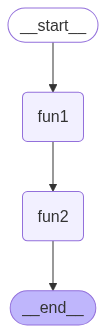

In [ ]:
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
app.invoke("Hi this is Sainadh")

'Hi this is Sainadh from first function Bahadursha from second function'

In [ ]:
for output in app.stream("hi this is Sainadh"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("___________")
        print(value)
        print("\n")

here is output from fun1
___________
hi this is Sainadh from first function


here is output from fun2
___________
hi this is Sainadh from first function Bahadursha from second function




In [ ]:
def llm(input):
    from langchain_google_genai import ChatGoogleGenerativeAI
    model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')
    output=model.invoke(input)
    return output.content

In [ ]:
def token_counter(input):
    token=input.split()
    token_number=len(token)
    return f"total token number in the generated answer is {token_number}"

In [ ]:
workflow2 = Graph()

In [ ]:
workflow2.add_node("My_LLM",llm)

In [ ]:
workflow2.add_node("LLM_Output_Token_Counter",token_counter)

In [ ]:
workflow2.add_edge("My_LLM","LLM_Output_Token_Counter")

In [ ]:
workflow2.set_entry_point("My_LLM")

In [ ]:
workflow2.set_finish_point("LLM_Output_Token_Counter")

In [ ]:
app=workflow2.compile()

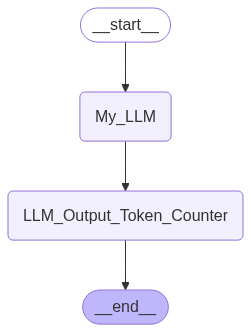

In [ ]:
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
app.invoke("can you tell me about the india's capital?")

'total token number in the generated answer is 53'

In [ ]:
app.invoke("tell me about the tata enterpirse in very detail.")

'total token number in the generated answer is 730'

In [ ]:
for output in app.stream("tell me about the tata enterpirse in very detail."):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from My_LLM
_______
Tata Enterprises is not a single entity, but rather a vast and complex conglomerate known as the Tata Group.  Understanding it requires looking at its history, structure, subsidiaries, and overall impact.

**I. History:**

The Tata Group's origins trace back to 1868 with the establishment of a trading company by Jamsetji Tata.  His vision extended beyond mere profit, encompassing philanthropic endeavors and a commitment to nation-building.  Key milestones include:

* **Early years (late 19th & early 20th centuries):**  Focus on textiles, followed by ventures into hospitality (Taj Hotels), steel (Tata Steel), and power generation.  This period established the core principles of the group – ethical conduct, social responsibility, and long-term vision.
* **Post-independence India:**  The Tata Group played a crucial role in India's industrialization, expanding into diverse sectors like automobiles (Tata Motors), chemicals, and information technology (Tata

## Langgraph Intro 2

### Config the model

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')
output=model.invoke("hi")
print(output.content)

Hi there! How can I help you today?


### Config the embedding model

In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-small-en")
len(embeddings.embed_query("hi"))

c:\Users\saina\.conda\envs\agentic_2_base\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


384

### lets take a data embedd it and store in VDB

In [ ]:
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [ ]:
loader=DirectoryLoader("data",glob="./*.txt",loader_cls=TextLoader)

In [ ]:
docs=loader.load()

In [ ]:
docs

[Document(metadata={'source': 'data\\speech.txt'}, page_content='The world must be made safe for democracy. Its peace must be planted upon the tested foundations of political liberty. We have no selfish ends to serve. We desire no conquest, no dominion. We seek no indemnities for ourselves, no material compensation for the sacrifices we shall freely make. We are but one of the champions of the rights of mankind. We shall be satisfied when those rights have been made as secure as the faith and the freedom of nations can make them.\n\nJust because we fight without rancor and without selfish object, seeking nothing for ourselves but what we shall wish to share with all free peoples, we shall, I feel confident, conduct our operations as belligerents without passion and ourselves observe with proud punctilio the principles of right and of fair play we profess to be fighting for.\n\n…\n\nIt will be all the easier for us to conduct ourselves as belligerents in a high spirit of right and fairn

In [ ]:
docs[0].page_content

'The world must be made safe for democracy. Its peace must be planted upon the tested foundations of political liberty. We have no selfish ends to serve. We desire no conquest, no dominion. We seek no indemnities for ourselves, no material compensation for the sacrifices we shall freely make. We are but one of the champions of the rights of mankind. We shall be satisfied when those rights have been made as secure as the faith and the freedom of nations can make them.\n\nJust because we fight without rancor and without selfish object, seeking nothing for ourselves but what we shall wish to share with all free peoples, we shall, I feel confident, conduct our operations as belligerents without passion and ourselves observe with proud punctilio the principles of right and of fair play we profess to be fighting for.\n\n…\n\nIt will be all the easier for us to conduct ourselves as belligerents in a high spirit of right and fairness because we act without animus, not in enmity toward a people

In [ ]:
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=50
)

In [ ]:
new_docs=text_splitter.split_documents(documents=docs)

In [ ]:
new_docs

[Document(metadata={'source': 'data\\speech.txt'}, page_content='The world must be made safe for democracy. Its peace must be planted upon the tested foundations of political liberty. We have no selfish ends to serve. We desire no conquest, no dominion. We seek no'),
 Document(metadata={'source': 'data\\speech.txt'}, page_content='We desire no conquest, no dominion. We seek no indemnities for ourselves, no material compensation for the sacrifices we shall freely make. We are but one of the champions of the rights of mankind.'),
 Document(metadata={'source': 'data\\speech.txt'}, page_content='one of the champions of the rights of mankind. We shall be satisfied when those rights have been made as secure as the faith and the freedom of nations can make them.'),
 Document(metadata={'source': 'data\\speech.txt'}, page_content='Just because we fight without rancor and without selfish object, seeking nothing for ourselves but what we shall wish to share with all free peoples, we shall, I feel

In [ ]:
doc_string=[doc.page_content for doc in new_docs]

In [ ]:
doc_string

['The world must be made safe for democracy. Its peace must be planted upon the tested foundations of political liberty. We have no selfish ends to serve. We desire no conquest, no dominion. We seek no',
 'We desire no conquest, no dominion. We seek no indemnities for ourselves, no material compensation for the sacrifices we shall freely make. We are but one of the champions of the rights of mankind.',
 'one of the champions of the rights of mankind. We shall be satisfied when those rights have been made as secure as the faith and the freedom of nations can make them.',
 'Just because we fight without rancor and without selfish object, seeking nothing for ourselves but what we shall wish to share with all free peoples, we shall, I feel confident, conduct our',
 'peoples, we shall, I feel confident, conduct our operations as belligerents without passion and ourselves observe with proud punctilio the principles of right and of fair play we profess to be',
 'of right and of fair play we p

In [ ]:
len(doc_string)

82

In [ ]:
db=Chroma.from_documents(new_docs,embeddings)

TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

## Langgraph Agent

### Config the model

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')
output=model.invoke("hi")
print(output.content)

Hi there! How can I help you today?


### Config the embedding model

In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-small-en")
len(embeddings.embed_query("hi"))

c:\Users\saina\.conda\envs\agentic_2_base\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\saina\.conda\envs\agentic_2_base\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\saina\.cache\huggingface\hub\models--BAAI--bge-small-en. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activ

384

### Creating the agent

In [ ]:
import operator
from typing import List
from pydantic import BaseModel , Field
from langchain.prompts import PromptTemplate
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,END, START
from langchain.output_parsers import PydanticOutputParser
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS


In [ ]:
class TopicSelectionParser(BaseModel):
    Topic:str=Field(description="selected topic")
    Reasoning:str=Field(description='Reasoning behind topic selection')

In [ ]:
parser=PydanticOutputParser(pydantic_object=TopicSelectionParser)
parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```'

In [ ]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [ ]:
def function_1(state:AgentState):

    question=state["messages"][-1]

    print("Question",question)

    template="""
    Your task is to classify the given user query into one of the following related categories: [Constitution,LLM, Latest]. If question is about
    Indian constitution then Constitution, if question is generic then LLM and if question is about some recent thing which you don't know then Latest.
    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}
    """

    prompt= PromptTemplate(
        template=template,
        input_variable=["question"],
        partial_variables={"format_instructions": parser.get_format_instructions()}
    )


    chain= prompt | model | parser


    response = chain.invoke({"question":question})

    print("Parsed response:", response)

    return {"messages": [response.Topic]}

In [ ]:
def router(state:AgentState):
    print("-> ROUTER ->")

    last_message=state["messages"][-1]
    print("last_message:", last_message)

    if "constitution" in last_message.lower():
        return "RAG Call"
    elif "latest" in last_message.lower():
        return "WEB Call"
    else:
        return "LLM Call"

In [ ]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [ ]:
# Load a PDF and validate the page count
file_path = r"C:\Users\saina\Desktop\DS_ML_AI\Krish_Naik_Courses\Krish_naik_1_Agentic_AI_and_Gen_AI\Practice\agentic_ai_2\data\2023050195.pdf"
loader = PyPDFLoader(file_path)
pages = loader.load()

if len(pages) < 200:
    raise ValueError("The PDF must have at least 200 pages.")

#Using semantic chunking with recursive text splitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=100)
chunks = text_splitter.split_documents(pages)


# Hugging Face embedding
embedding_model = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

faiss_flat = FAISS.from_documents(chunks, embedding_model)
retriever_flat = faiss_flat.as_retriever()

C:\Users\saina\AppData\Local\Temp\ipykernel_1676\3562440359.py:15: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")


In [ ]:
# RAG Function
def function_2(state:AgentState):
    print("-> RAG Call ->")

    question = state["messages"][0]

    prompt=PromptTemplate(
        template="""You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:""",

        input_variables=['context', 'question']
    )

    rag_chain = (
        {"context": retriever_flat | format_docs, "question": RunnablePassthrough()}
        | prompt
        | model
        | StrOutputParser()
    )
    result = rag_chain.invoke(question)
    return  {"messages": [result]}

In [ ]:
# LLM Function
def function_3(state:AgentState):
    print("-> LLM Call ->")
    question = state["messages"][0]

    # Normal LLM call
    complete_query = "Answer the follow question with you knowledge of the real world. Following is the user question: " + question
    response = model.invoke(complete_query)
    return {"messages": [response.content]}

In [ ]:
from langchain_community.tools import DuckDuckGoSearchRun
def search_fun(state:AgentState):
    search=DuckDuckGoSearchRun()
    result = search.invoke({"query":state["messages"][0]})
    return {"messages": [result]}


In [ ]:
def function_4(state:AgentState):

    question = state["messages"][0]
    answer=state["messages"][-1]

    print("answer",answer)

    template="""
    Your task is to check if the response is related to the user question.
    Only respond with yes or no and nothing else.

    User query: {question}
    response: {answer}
    {format_instructions}
    """

    prompt= PromptTemplate(
        template=template,
        input_variable=["question","answer"],
        partial_variables={"format_instructions": parser.get_format_instructions()}
    )


    chain= prompt | model | parser

    response = chain.invoke({"question":question,"answer":answer})

    print("Parsed response:", response)

    return {"messages": [response.Topic]}

In [ ]:
def router_1(state:AgentState):
    print("-> ROUTER_1 ->")

    last_message=state["messages"][-1]
    print("last_message:", last_message)

    if "yes" in last_message.lower():
        return "yes"
    else:
        return "no"

In [ ]:
workflow=StateGraph(AgentState)
workflow.add_node("Supervisor",function_1)
workflow.add_node("RAG",function_2)
workflow.add_node("LLM",function_3)
workflow.add_node("WEB", search_fun)
workflow.add_node("VALIDATION",function_4)
workflow.set_entry_point("Supervisor")

In [ ]:
workflow.add_conditional_edges(
    "Supervisor",
    router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
        "WEB Call": "WEB",
    }
)

In [ ]:
workflow.add_edge("RAG","VALIDATION")
workflow.add_edge("LLM","VALIDATION")
workflow.add_edge("WEB","VALIDATION")

workflow.add_conditional_edges(
    "VALIDATION",
    router_1,
    {
        "yes": END,
        "no":"Supervisor"
    }

)

In [ ]:
app=workflow.compile()

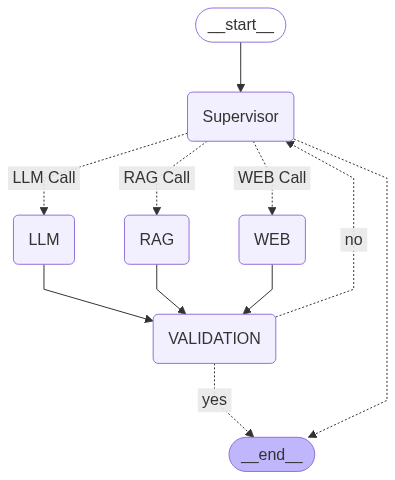

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
state={"messages":["How to make black tea?, list down in simple steps"]}
app.invoke(state)

Question How to make black tea?, list down in simple steps
Parsed response: Topic='LLM' Reasoning='The query is a generic question about making tea, not related to the Indian Constitution or recent events.'
-> ROUTER ->
last_message: LLM
-> LLM Call ->
answer How to Make Black Tea (Simple Steps):

1. **Boil Water:**  Heat fresh water to a rolling boil.  The temperature is crucial for optimal flavor extraction;  around 200-212°F (93-100°C) is ideal.

2. **Warm the Teapot (Optional):**  Pour a small amount of boiling water into your teapot and swirl it around to preheat it. This helps maintain the water temperature and prevents the tea from cooling down too quickly. Empty the water before adding tea leaves.

3. **Add Tea Leaves:**  Use one teaspoon of loose leaf tea or one tea bag per cup of water.  More tea will result in a stronger brew.

4. **Pour Water Over Tea:** Slowly pour the boiling water over the tea leaves or tea bag. Make sure all the leaves are submerged.

5. **Steep:** Let 

{'messages': ['How to make black tea?, list down in simple steps',
  'LLM',
  "How to Make Black Tea (Simple Steps):\n\n1. **Boil Water:**  Heat fresh water to a rolling boil.  The temperature is crucial for optimal flavor extraction;  around 200-212°F (93-100°C) is ideal.\n\n2. **Warm the Teapot (Optional):**  Pour a small amount of boiling water into your teapot and swirl it around to preheat it. This helps maintain the water temperature and prevents the tea from cooling down too quickly. Empty the water before adding tea leaves.\n\n3. **Add Tea Leaves:**  Use one teaspoon of loose leaf tea or one tea bag per cup of water.  More tea will result in a stronger brew.\n\n4. **Pour Water Over Tea:** Slowly pour the boiling water over the tea leaves or tea bag. Make sure all the leaves are submerged.\n\n5. **Steep:** Let the tea steep for 3-5 minutes.  Steeping time affects the strength and bitterness of the tea.  Experiment to find your preferred strength.  Longer steeping times generally

In [ ]:
state={"messages":["List all the fundamental duties?"]}
app.invoke(state)

Question List all the fundamental duties?
Parsed response: Topic='Constitution' Reasoning='The query asks about fundamental duties, a key component of the Indian Constitution.'
-> ROUTER ->
last_message: Constitution
-> RAG Call ->
answer The fundamental duties of Indian citizens include abiding by the Constitution and respecting its ideals, cherishing the ideals of the freedom struggle, and upholding India's sovereignty.  Additional duties involve defending the country, protecting the environment, and safeguarding national monuments.  A complete list is found in Article 51A of the Constitution.
Parsed response: Topic='yes' Reasoning="The response directly addresses the user's request by listing and describing fundamental duties, even referencing the relevant constitutional article."
-> ROUTER_1 ->
last_message: yes


{'messages': ['List all the fundamental duties?',
  'Constitution',
  "The fundamental duties of Indian citizens include abiding by the Constitution and respecting its ideals, cherishing the ideals of the freedom struggle, and upholding India's sovereignty.  Additional duties involve defending the country, protecting the environment, and safeguarding national monuments.  A complete list is found in Article 51A of the Constitution.",
  'yes']}

In [ ]:
state={"messages":["what is the net worth of Elon Musk"]}
app.invoke(state)

Question what is the net worth of Elon Musk
Parsed response: Topic='Latest' Reasoning="The query asks about Elon Musk's net worth, which is a current event and not directly related to the Indian Constitution or LLMs."
-> ROUTER ->
last_message: Latest
answer Elon Musk on the 2025 The Richest Person In Every State. ... Elon Musk's net worth fell by the equivalent of almost five times Trump's $5.5 billion net worth Thursday. Tesla shares fell after Elon Musk's public disagreement with the president. Musk's net worth, though still the world's highest, has fluctuated significantly, peaking at $400 billion in December 2024. Elon Musk is a South African-born Canadian-American businessman, inventor, and investor who has a net worth of $368 billion. Elon Musk is currently the richest person in the world. In November ... Elon Musk's net worth peaked at $486 billion in December 2024, but by March 2025, his fortune had decreased to approximately $330 billion. The market capitalization of Tesla's 

{'messages': ['what is the net worth of Elon Musk',
  'Latest',
  "Elon Musk on the 2025 The Richest Person In Every State. ... Elon Musk's net worth fell by the equivalent of almost five times Trump's $5.5 billion net worth Thursday. Tesla shares fell after Elon Musk's public disagreement with the president. Musk's net worth, though still the world's highest, has fluctuated significantly, peaking at $400 billion in December 2024. Elon Musk is a South African-born Canadian-American businessman, inventor, and investor who has a net worth of $368 billion. Elon Musk is currently the richest person in the world. In November ... Elon Musk's net worth peaked at $486 billion in December 2024, but by March 2025, his fortune had decreased to approximately $330 billion. The market capitalization of Tesla's stock fell from ... View net worth over: Max 1 year 1 quarter 1 month 1 week. Net Worth Summary. Cash. Private asset. ... 1971 Elon Musk is born in Pretoria, South Africa. 1981 Buys first comp

# Last